In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns

import warnings
warnings.simplefilter('ignore')



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


Test different basic models to determine best model for further optimisation
weak learners:
* KNN
* Decision Tree
* Logistic Regression
* SVM
* Naive Bayes

determine AUC, f1 score and confusion matrix

In [55]:
df = pd.read_csv('data/train.csv')
df.head(10)

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_statue_mode,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean,counter_type_mode
0,60,11,101,0.0,35,352.400000,10.571429,0.000000,0.000000,11.000000,1.335667e+06,0,203.685714,6.971429,1.0,362.971429,4.628571,0
1,69,11,107,0.0,37,557.540541,0.000000,0.000000,0.000000,11.000000,6.789020e+05,0,203.000000,7.216216,1.0,557.540541,4.324324,0
2,62,11,301,0.0,18,798.611111,37.888889,0.000000,0.000000,11.000000,5.727650e+05,0,203.222222,7.055556,1.0,836.500000,6.444444,0
3,69,11,105,0.0,20,1.200000,0.000000,0.000000,0.000000,11.000000,2.078000e+03,0,413.000000,6.150000,1.0,1.200000,4.200000,0
4,62,11,303,0.0,14,663.714286,104.857143,117.357143,36.714286,11.000000,1.957500e+04,0,207.000000,8.857143,1.0,922.642857,3.714286,0
5,69,11,103,0.0,48,352.104167,10.437500,3.770833,0.000000,22.479167,8.149729e+05,0,124.625000,7.708333,1.0,366.312500,4.000000,0
6,62,11,309,0.0,40,280.025000,6.550000,0.000000,0.000000,25.500000,4.446350e+04,0,209.000000,7.975000,1.0,286.575000,3.700000,[0 1]
7,60,11,101,0.0,78,327.500000,0.923077,0.000000,0.000000,25.128205,5.904181e+05,0,106.538462,7.025641,1.0,328.423077,3.871795,0
8,62,11,301,0.0,2,112.500000,0.000000,0.000000,0.000000,11.000000,1.441290e+05,0,413.000000,7.500000,1.0,112.500000,4.000000,0
9,60,11,101,0.0,5,850.800000,1629.200000,320.000000,4882.000000,11.000000,5.868000e+05,0,467.000000,9.000000,1.0,7682.000000,4.000000,0


Preprocessing of Data

In [56]:
# dropping counter_statue_mode and counter_type_mode
df_original = df
df.drop(['counter_type_mode', 'counter_statue_mode'], axis=1, inplace=True)
df.head(10)

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean
0,60,11,101,0.0,35,352.400000,10.571429,0.000000,0.000000,11.000000,1.335667e+06,203.685714,6.971429,1.0,362.971429,4.628571
1,69,11,107,0.0,37,557.540541,0.000000,0.000000,0.000000,11.000000,6.789020e+05,203.000000,7.216216,1.0,557.540541,4.324324
2,62,11,301,0.0,18,798.611111,37.888889,0.000000,0.000000,11.000000,5.727650e+05,203.222222,7.055556,1.0,836.500000,6.444444
3,69,11,105,0.0,20,1.200000,0.000000,0.000000,0.000000,11.000000,2.078000e+03,413.000000,6.150000,1.0,1.200000,4.200000
4,62,11,303,0.0,14,663.714286,104.857143,117.357143,36.714286,11.000000,1.957500e+04,207.000000,8.857143,1.0,922.642857,3.714286
5,69,11,103,0.0,48,352.104167,10.437500,3.770833,0.000000,22.479167,8.149729e+05,124.625000,7.708333,1.0,366.312500,4.000000
6,62,11,309,0.0,40,280.025000,6.550000,0.000000,0.000000,25.500000,4.446350e+04,209.000000,7.975000,1.0,286.575000,3.700000
7,60,11,101,0.0,78,327.500000,0.923077,0.000000,0.000000,25.128205,5.904181e+05,106.538462,7.025641,1.0,328.423077,3.871795
8,62,11,301,0.0,2,112.500000,0.000000,0.000000,0.000000,11.000000,1.441290e+05,413.000000,7.500000,1.0,112.500000,4.000000
9,60,11,101,0.0,5,850.800000,1629.200000,320.000000,4882.000000,11.000000,5.868000e+05,467.000000,9.000000,1.0,7682.000000,4.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  int64  
 1   client_catg                135493 non-null  int64  
 2   region                     135493 non-null  int64  
 3   target                     135493 non-null  float64
 4   1transactions_count        135493 non-null  int64  
 5   consommation_level_1_mean  135493 non-null  float64
 6   consommation_level_2_mean  135493 non-null  float64
 7   consommation_level_3_mean  135493 non-null  float64
 8   consommation_level_4_mean  135493 non-null  float64
 9   tarif_type_mean            135493 non-null  float64
 10  counter_number_mean        135493 non-null  float64
 11  counter_code_mean          135493 non-null  float64
 12  reading_remarque_mean      135493 non-null  float64
 13  counter_coefficient_mean   13

In [58]:
#checking for duplicates
df.duplicated().value_counts()

False    135492
True          1
dtype: int64

In [59]:
#dropping duplicates
df = df.drop_duplicates()

In [60]:
df.shape

(135492, 16)

In [62]:
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Logistic Regression

In [10]:
model_list = []

In [63]:
# Logistic Regression
dict = {0:20, 1:2000}
lr = LogisticRegression(class_weight=dict)
model_list.append(lr)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
#y_proba = lr.predict_proba(X_test)
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_lr))

0.6000971852946059
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     25586
         1.0       0.06      1.00      0.11      1513

    accuracy                           0.06     27099
   macro avg       0.03      0.50      0.05     27099
weighted avg       0.00      0.06      0.01     27099



In [34]:
#KNN
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)
model_list.append(knn)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
#y_proba = knn.predict_proba(X_test)
print(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_knn))

0.6370875275737635
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     25586
         1.0       0.45      0.12      0.20      1513

    accuracy                           0.94     27099
   macro avg       0.70      0.56      0.58     27099
weighted avg       0.92      0.94      0.93     27099



<AxesSubplot:xlabel='target', ylabel='delta_index_mean'>

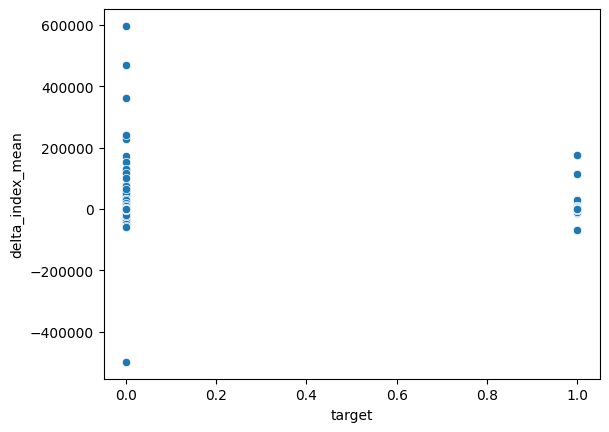

In [66]:
sns.scatterplot(x=df.target, y=df.delta_index_mean)

In [64]:
#Decision Tree
tree = DecisionTreeClassifier(criterion = "gini") 
model_list.append(tree)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
#y_proba = tree.predict_proba(X_test)
print(roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_tree))

0.580630057880815
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     25586
         1.0       0.19      0.21      0.20      1513

    accuracy                           0.91     27099
   macro avg       0.57      0.58      0.58     27099
weighted avg       0.91      0.91      0.91     27099



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'disrict'),
  Text(1, 0, 'client_catg'),
  Text(2, 0, 'region'),
  Text(3, 0, '1transactions_count'),
  Text(4, 0, 'consommation_level_1_mean'),
  Text(5, 0, 'consommation_level_2_mean'),
  Text(6, 0, 'consommation_level_3_mean'),
  Text(7, 0, 'consommation_level_4_mean'),
  Text(8, 0, 'tarif_type_mean'),
  Text(9, 0, 'counter_number_mean'),
  Text(10, 0, 'counter_code_mean'),
  Text(11, 0, 'reading_remarque_mean'),
  Text(12, 0, 'counter_coefficient_mean'),
  Text(13, 0, 'months_number_mean'),
  Text(14, 0, 'delta_index')])

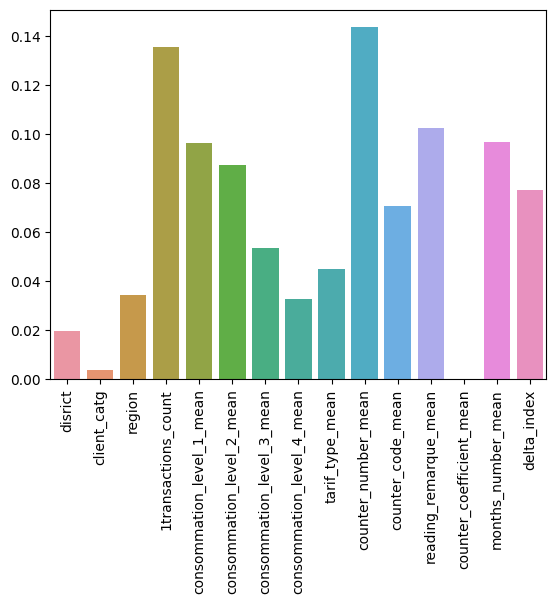

In [47]:
sns.barplot(x=X.columns, y=tree.feature_importances_)
plt.xticks(rotation=90)

In [39]:
tree.feature_importances_

array([1.71159091e-02, 4.90570568e-03, 3.62548698e-02, 7.06403224e-02,
       9.87956136e-02, 7.61783629e-02, 5.38796899e-02, 2.94777078e-02,
       4.05992787e-02, 1.21749041e-01, 7.11762959e-02, 9.25672564e-02,
       1.29016542e-04, 1.32365524e-01, 6.58194722e-02, 8.83459339e-02])

In [14]:
#support vector machine
#vec = SVC(kernel='linear', C=1, gamma='auto')
#model_list.append(vec)
#vec.fit(X_train.iloc[:1500], y_train.iloc[:1500])
#y_pred_vec = vec.predict(X_test)
#y_proba = vec.predict_proba(X_test)
#print(roc_auc_score(y_test, vec.predict_proba(X_test)[:, 1]))
#print(classification_report(y_test, y_pred_vec))


In [15]:
#Naive Bayes
gnb = GaussianNB()
model_list.append(gnb)
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
#y_proba = gnb.predict_proba(X_test)
print(roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_gnb))

0.5799739241072279
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     25586
         1.0       0.00      0.00      0.00      1513

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.92     27099



In [16]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(criterion = "gini") 
vec = SVC(kernel='linear', C=1, gamma='auto')
gnb = GaussianNB()

In [17]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

# Define a train and evaluation function 
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    learner = learner.fit(X_train, np.ravel(y_train))
    
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])

            
    # TODO: Compute accuracy on the first 300 training samples
    results['auc_train'] = roc_auc_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=1)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=1)
       
    # Success
    print ("{} trained on the data.".format(learner.__class__.__name__))
    
    # Return the results
    return results

In [18]:
# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
#samples_1 = int(round(len(X_train) / 100))
#samples_10 = int(round(len(X_train) / 10))
#samples_100 = len(X_train)

# Collect results on the learners
#results = {}
#for clf in [lr, knn, tree, gnb]:
#    clf_name = clf.__class__.__name__
#    results[clf_name] = {}
#    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)
#    print(results)

#results